In [0]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt(
    f'https://people.sc.fsu.edu/~jburkardt/datasets/regression/x06.txt',
    skiprows=37,
)

print(f'Sanity check:\n{data[:5]}')

Sanity check:
[[1.000e+00 1.400e+01 2.500e+01 6.200e+02]
 [2.000e+00 2.800e+01 2.500e+01 1.315e+03]
 [3.000e+00 4.100e+01 2.500e+01 2.120e+03]
 [4.000e+00 5.500e+01 2.500e+01 2.600e+03]
 [5.000e+00 6.900e+01 2.500e+01 3.110e+03]]


In [0]:
x = data[:, 1:3] # take age of fish and water temperature
y = data[:, 3].reshape(44, 1) # take the fish size

In [4]:
# regressing with least squares method
X = np.concatenate([np.ones((44, 1)), x], axis=1)
XtXinv = la.inv(X.T @ X)
M = XtXinv @ X.T @ y
print(f'Regression coefficients:\n{M}')

Regression coefficients:
[[3904.26601675]
 [  26.24068177]
 [-106.41363636]]


In [0]:
# plotting the approximations
age_extra = np.array(list(range(10,161,2))*50)
tempr_extra=np.array([[i]*(age_extra.shape[0]//10) for i in range(23, 33)]).flatten()
_ones = np.ones_like(age_extra)
_domain = np.concatenate((_ones, age_extra, tempr_extra)).reshape(3,*age_extra.shape).T
size_extra = _domain @ M

In [0]:
size_approx = X @ M # for MAE and plotting
approx_lt_orig = (size_approx < y).flatten() # indices for plotting

Following graph represents fish size as the size of a circle.
Orange circle on black means the approximation is larger
than the real size, and vice versa for black on orange.



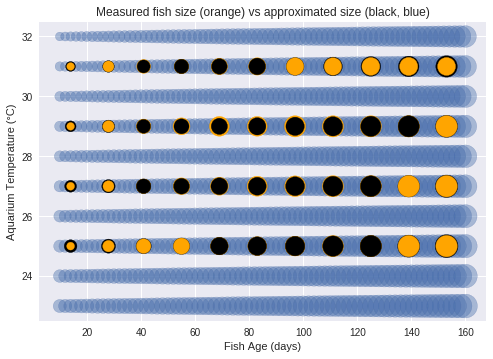

In [7]:
age, tempr = x[:, 0], x[:, 1]

plt.scatter(age_extra, tempr_extra, size_extra/10, alpha=0.1)
plt.scatter(age, tempr, size_approx/10, color='black', alpha=1)
plt.scatter(age, tempr, y/10, alpha=1, color='orange')
plt.scatter(
    age[approx_lt_orig],
    tempr[approx_lt_orig],
    (size_approx/10)[approx_lt_orig],
    color='black',
    alpha=1
)
plt.xlabel('Fish Age (days)')
plt.ylabel('Aquarium Temperature (°C)')
plt.title('Measured fish size (orange) vs approximated size (black, blue)')

print(
    'Following graph represents fish size as the size of a circle.\n'
    'Orange circle on black means the approximation is larger\n'
    'than the real size, and vice versa for black on orange.\n'
)
plt.show()

In [8]:
MAE = sum(abs(size_approx - y))/44
print(f'The mean average error is {MAE[0]:.4}')

The mean average error is 459.4
